## Assignment 2
### Pradeep Mundlik, AI21BTECH11022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import chi2
import seaborn as sns
sns.set_theme()

### Q-1

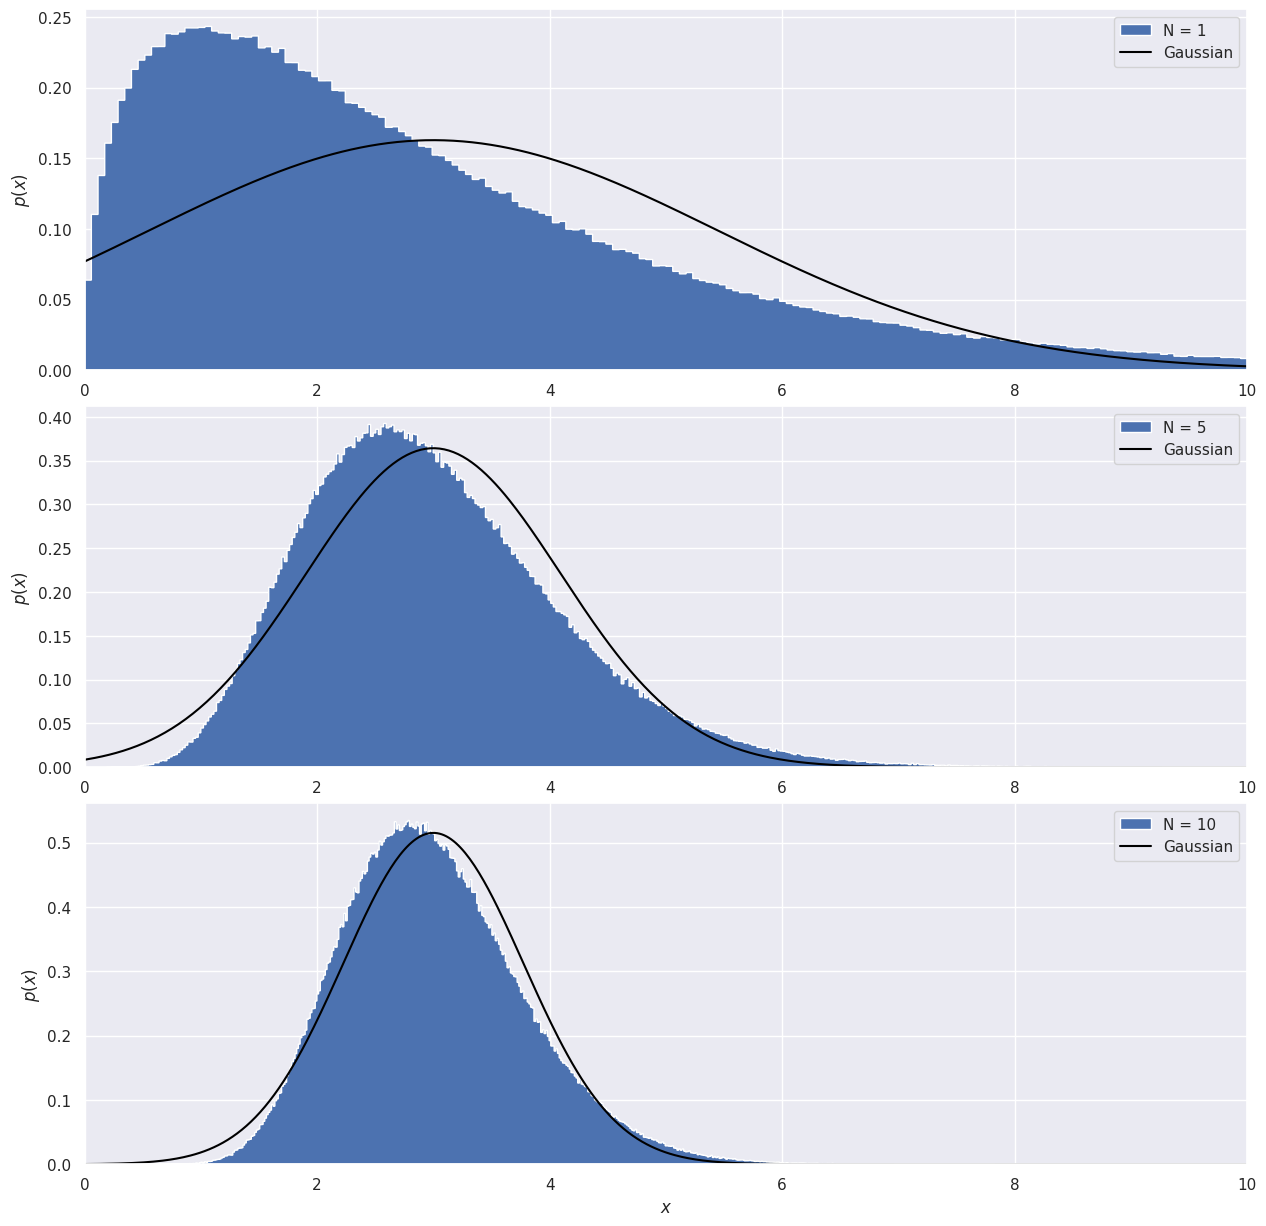

In [2]:
N = [1, 5, 10]
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.1)

for i in range(3):
    ax = fig.add_subplot(3, 1, i + 1)

    x = np.random.chisquare(df=3, size=(N[i], 1000000))
    x = x.mean(axis=0)
    ax.hist(x, bins=500, histtype='stepfilled', label=f'N = {N[i]}', density=True)
    
    mu = 3
    sigma = np.sqrt(6/N[i])

    x_pdf = np.linspace(-10, 10, 1000)
    gau = stats.norm(mu, sigma).pdf(x_pdf)
    ax.plot(x_pdf, gau, color='#000', label='Gaussian')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel('$p(x)$')
    ax.set_xlim(0, 10)
    ax.legend()
plt.show()

### Q-2

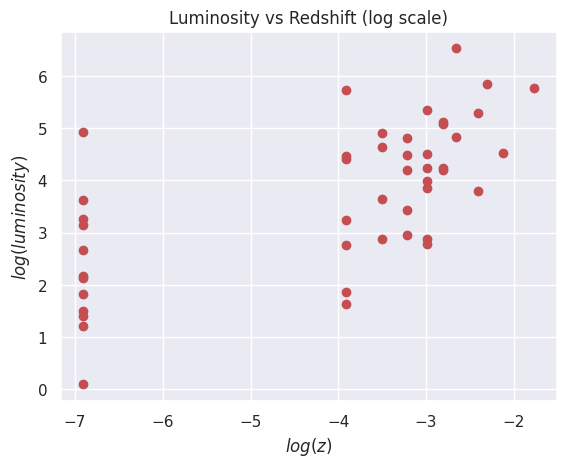

In [3]:
df = pd.read_csv('https://people.iith.ac.in/shantanud/test.dat', sep=' ')
plt.scatter(np.log(df['z']), np.log(df['#Lx']), color='r')
plt.ylabel('$log(luminosity)$')
plt.xlabel('$log(z)$')
plt.title('Luminosity vs Redshift (log scale)')
plt.show()

In [4]:
print("From eye, some part of the data does seem correlated.")

pearson = stats.pearsonr(df["z"] , df["#Lx"])
print(pearson)
print("The Pearson Correlation coefficient is {} and the p_value is {} ".format(pearson[0] , pearson[1]))

spearman = stats.spearmanr(df["z"] , df["#Lx"])
print("The Spearman Correlation coefficient is {} and the p_value is {} ".format(spearman[0] , spearman[1]))

kendall = stats.kendalltau(df["z"] , df["#Lx"])
print("The Kendall-tau Correlation coefficient is {} and the p_value is {} ".format(kendall[0] , kendall[1]))

From eye, some part of the data does seem correlated.
(0.5144497852670242, 0.0002546471657612425)
The Pearson Correlation coefficient is 0.5144497852670242 and the p_value is 0.0002546471657612425 
The Spearman Correlation coefficient is 0.6596325957535454 and the p_value is 6.166489759081011e-07 
The Kendall-tau Correlation coefficient is 0.5029584682704178 and the p_value is 2.9696862274734036e-06 


We can see that $p$ value for Pearson null hypothesis is less than 0.05, so we can say that there is significant liner relationship between values of Luminosity and Redshift.

### Q-3

In [5]:
wind_data = [
[0,2.75],
[1,7.80],
[2,11.64],
[3,13.79],
[4,14.20],
[5,13.15],
[6,11.14],
[7,8.72],
[8,6.34],
[9,4.30],
[10,2.73],
[11,1.62],
[12,0.91],
[13,0.48],
[14,0.24],
[15,0.11],
[16,0.05],
[17,0.02],
[18,0.01],
[19,0.0]
]

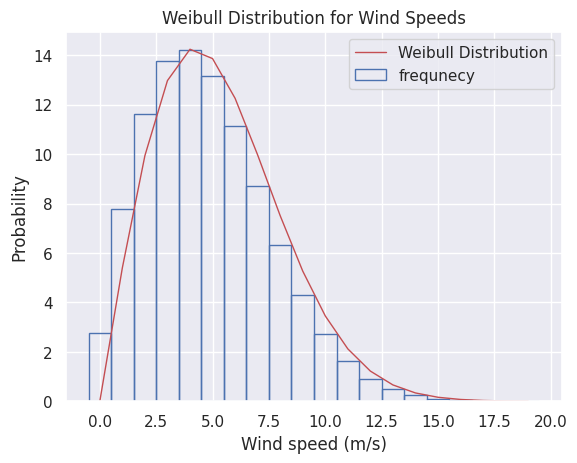

In [6]:
x = np.array(wind_data)[:, 0]

k = 2
A = 6
weibull = (k/A) * (x/A) ** (k-1) * np.exp(-(x/A)**(k))
weibull = weibull*100
plt.bar(x, np.array(wind_data)[:, 1], width=1, label = 'frequnecy', color = "none", edgecolor = 'b')
plt.plot(x , weibull , 'r' , linewidth = 1 , label = "Weibull Distribution")
plt.legend()
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Probability')
plt.title("Weibull Distribution for Wind Speeds")
plt.show()
plt.show()

### Q-4

In [7]:
l = 1000
x = stats.norm.rvs(0, 1, l)
y = stats.norm.rvs(0, 1, l)

coeff, p = stats.pearsonr(x, y)

abs_val = abs(coeff)
t = -abs_val * np.sqrt((l-2) / (1-(-abs_val)**2))
p_value_t = 2 * stats.t.cdf(t, l-2)

print('Pearson correlation coefficient = ',coeff, '\nPearson P Value = ',p)
print('t = ',t ,'\nStudent t distribution P Value = ',p_value_t)

Pearson correlation coefficient =  -0.009664001263705342 
Pearson P Value =  0.7601929216780483
t =  -0.3053110548116477 
Student t distribution P Value =  0.7601929216779759
